In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
%matplotlib inline

# Opening and storing the dataset

In [2]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Splitting the dataset. Target of the dataset is DEATH_EVENT (value = either 0 or 1). In features, we drop the target variable.

In [4]:
target = heart_failure['DEATH_EVENT']
features = heart_failure.drop('DEATH_EVENT', axis=1)

In [5]:
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


scaling the features

In [6]:
features_scaled = (features - features.mean()) / features.std()

# Choose n components

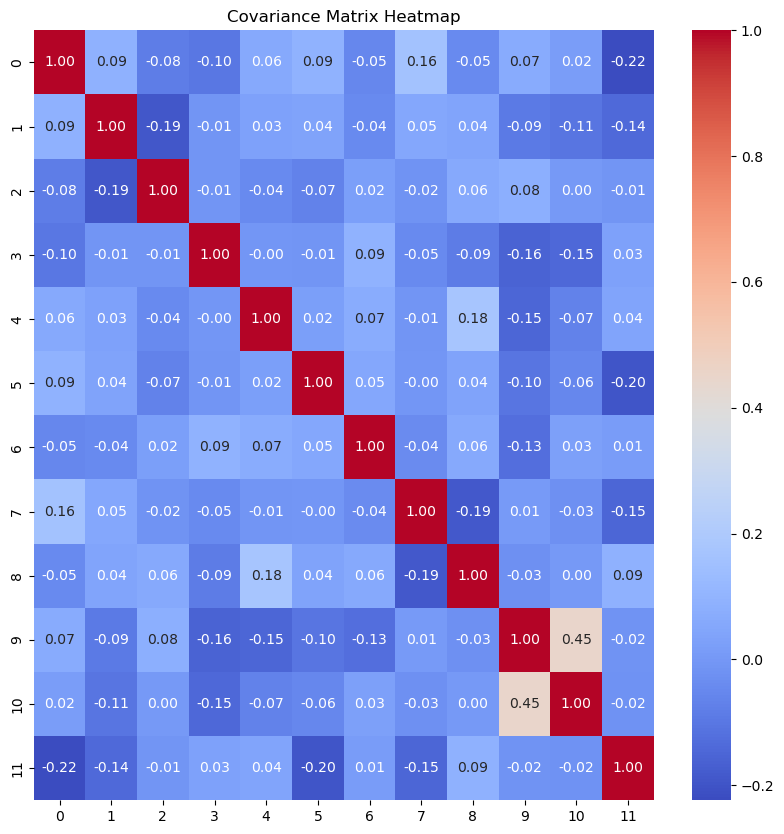

In [7]:
cov_matrix = np.cov(features_scaled.T)
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [8]:
n_components = range(1, 13)
explained_variances = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(features_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

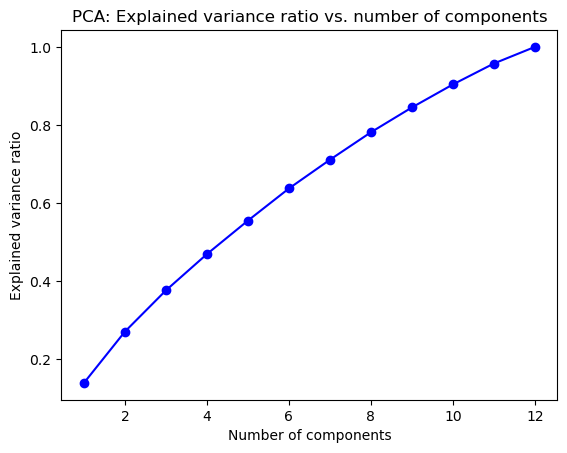

In [9]:
plt.plot(n_components, explained_variances, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('PCA: Explained variance ratio vs. number of components')
plt.show()

In [10]:
# choose 9 as the number of components
pca = PCA(n_components=9)
pca.fit(features_scaled)
transformed_features = pca.transform(features_scaled)
heart_failure_pca = pd.DataFrame(transformed_features, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
heart_failure_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.875587,2.283276,1.031500,1.475753,-0.260383,-0.980173,-0.939485,0.555345,-0.930640
1,1.860634,-1.550295,0.718616,3.998319,4.266658,-2.827684,2.863100,-0.548526,0.142126
2,2.522200,1.367529,1.283445,-0.066008,-0.614258,-0.383249,-0.388217,-0.010855,-0.461915
3,0.578596,1.141319,0.630118,-0.918735,-0.373610,-1.219863,1.503468,0.976776,0.257918
4,-0.958877,2.634967,4.423543,0.291563,-0.926146,1.022672,0.789397,0.438103,-0.572945


In [11]:
heart_failure_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,-3.044759e-17,-5.940993e-18,-5.978124e-17,3.063324e-17,-2.933365e-17,3.119021e-17,-2.227872e-18,4.604269e-17,-5.021995e-17
std,1.289560e+00,1.256621e+00,1.126118e+00,1.056380e+00,1.014832e+00,9.944224e-01,9.398713e-01,9.193958e-01,8.740811e-01
min,-2.673673e+00,-3.830976e+00,-3.336641e+00,-2.130893e+00,-2.519174e+00,-3.115836e+00,-2.110433e+00,-2.486951e+00,-2.859639e+00
25%,-1.180527e+00,-8.428055e-01,-7.597662e-01,-7.583601e-01,-6.733792e-01,-5.922135e-01,-6.829775e-01,-6.572301e-01,-5.382321e-01
50%,8.116233e-02,-6.943465e-02,-4.197126e-02,-6.780240e-02,-6.670855e-02,-5.569811e-02,8.566302e-03,1.046184e-01,3.086686e-02
75%,1.031653e+00,7.388551e-01,6.873779e-01,6.341422e-01,6.064203e-01,6.032156e-01,7.280241e-01,6.403005e-01,5.467564e-01
max,3.018124e+00,5.692735e+00,4.423543e+00,5.459469e+00,5.176271e+00,3.470279e+00,2.863100e+00,2.787798e+00,4.482208e+00


# SVM

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart_failure_pca, target, test_size=0.3, random_state=42)

Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.001,0.01,1,10,100,1000,10000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [17]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[48  5]
 [17 20]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81        53
           1       0.80      0.54      0.65        37

    accuracy                           0.76        90
   macro avg       0.77      0.72      0.73        90
weighted avg       0.76      0.76      0.74        90



Applying SVM

In [24]:
model = SVC(kernel='rbf', C=1000, gamma=0.001)
model.fit(heart_failure_pca, target)

SVC(C=1000, gamma=0.001)

Testing user input as an example

In [31]:
user_input = [62.0, 1, 447, 1, 30, 1, 265000.00, 2.5, 132, 1, 1, 7]
user_input_df = pd.DataFrame(columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
user_input_df.loc[len(user_input_df)] = user_input
user_input_transformed = pca.transform(user_input_df)
user_input_pca = pd.DataFrame(user_input_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])


In [32]:
prediction = model.predict(user_input_pca)
print(prediction)

[1]
